<a href="https://colab.research.google.com/github/SofiaMegh/Data-Analysis-Python-Programs/blob/main/Unemployment_Analysis_in_India_(Covid_19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
data = pd.read_csv("/content/Unemployment in India.csv")
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [3]:
#Let’s see if this dataset contains missing values or not:
print(data.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [8]:
data_cleaned = data.dropna()
print(data_cleaned)
data_cleaned = data.dropna(axis=1)
print(data_cleaned)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86   

      Estimated Employed   

In [12]:
#Calculate correlation

# Convert ' Estimated Unemployment Rate (%)' column to numeric type, handling errors
data[' Estimated Unemployment Rate (%)'] = pd.to_numeric(data[' Estimated Unemployment Rate (%)'], errors='coerce')

# Convert ' Estimated Employed' column to numeric type, handling errors
data[' Estimated Employed'] = pd.to_numeric(data[' Estimated Employed'], errors='coerce')

# Convert ' Estimated Labour Participation Rate (%)' column to numeric type, handling errors
data[' Estimated Labour Participation Rate (%)'] = pd.to_numeric(data[' Estimated Labour Participation Rate (%)'], errors='coerce')

# Now calculate the correlation matrix, only including numerical columns
correlation_matrix = data.select_dtypes(include=np.number).corr()
print(correlation_matrix)

                                           Estimated Unemployment Rate (%)  \
 Estimated Unemployment Rate (%)                                  1.000000   
 Estimated Employed                                              -0.222876   
 Estimated Labour Participation Rate (%)                          0.002558   

                                           Estimated Employed  \
 Estimated Unemployment Rate (%)                    -0.222876   
 Estimated Employed                                  1.000000   
 Estimated Labour Participation Rate (%)             0.011300   

                                           Estimated Labour Participation Rate (%)  
 Estimated Unemployment Rate (%)                                          0.002558  
 Estimated Employed                                                       0.011300  
 Estimated Labour Participation Rate (%)                                  1.000000  


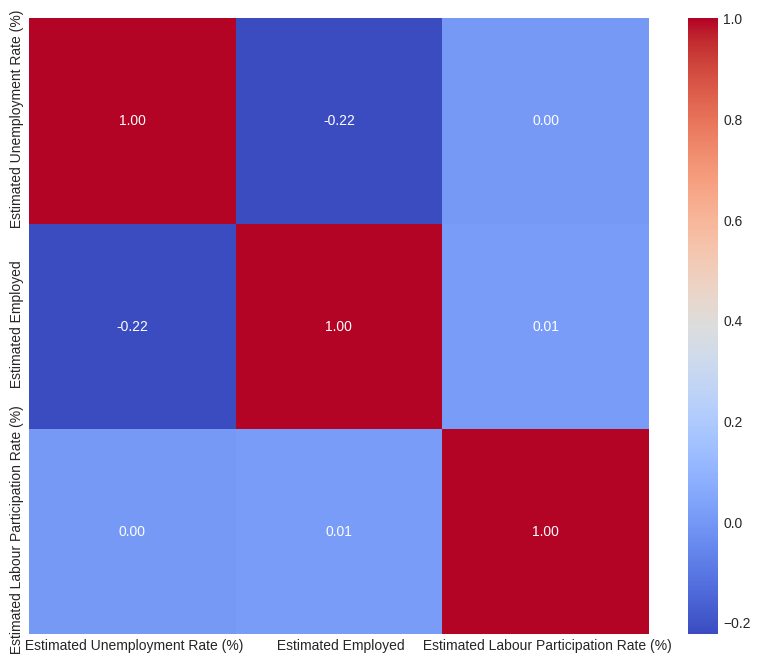

In [13]:
#Visualize the Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

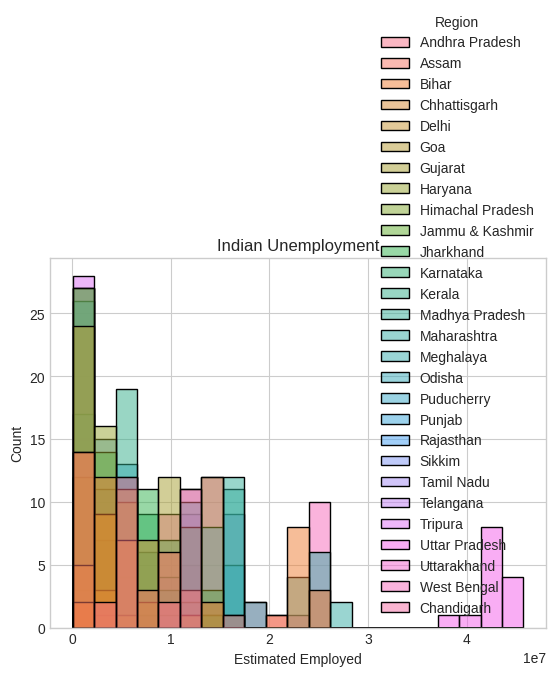

In [15]:
#Now let’s visualize the data to analyze the unemployment rate.

data.columns= ["Region","Date","Frequency",
               "Estimated Unemployment Rate (%)","Estimated Employed",
               "Estimated Labour Participation Rate (%)","Area"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

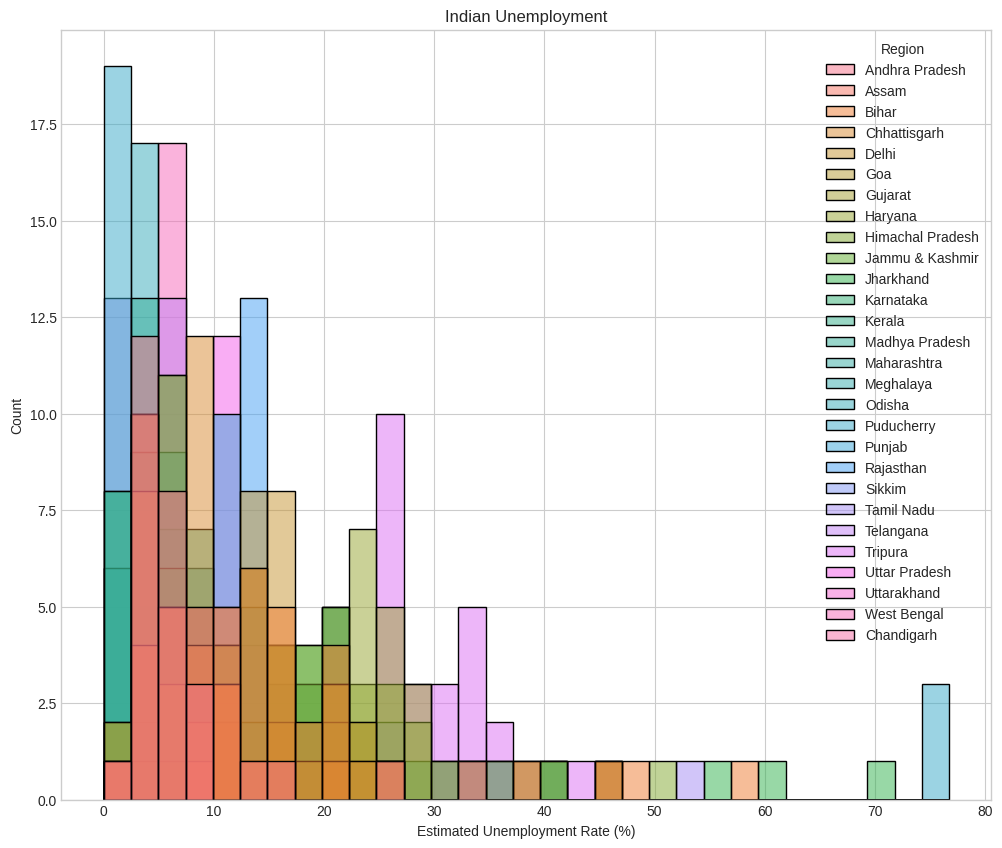

In [17]:
#let’s see the unemployment rate according to different regions of India:

plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate (%)", hue="Region", data=data)
plt.show()

In [20]:
#let’s create a dashboard to analyze the unemployment rate of each Indian state by region.
#let's use a sunburst plot:

unemploment = data[["Region", "Estimated Unemployment Rate (%)"]].dropna()
#Add .dropna() to remove rows with NaN
figure = px.sunburst(unemploment, path=["Region"],
                     values="Estimated Unemployment Rate (%)",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()

In [21]:
"""
This is how we can analyze the unemployment rate by using the Python programming language.
"""

'\nThis is how we can analyze the unemployment rate by using the Python programming language.\n'